In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [54]:
first_enter = pd.read_csv('Trainee Analyst Test DataSet - FirstEnter.csv')
retention = pd.read_csv('Trainee Analyst Test DataSet - RetentionRate.csv')

# Подсчет Retention Day 1

In [55]:
## Объединим данные о первом входе и источнике инсталла
retention = pd.merge(retention, first_enter[['PlayerUid', 'RefPlace']])

In [56]:
## Приводим даты к нужному формату
retention['Registered'] = pd.to_datetime(retention['Registered'].values,  format='%d.%m.%Y')
retention['DateTime'] = pd.to_datetime(retention['DateTime'].values,  format='%d.%m.%Y')

In [57]:
## Для каждой даты входа узнаем, является ли это входом на следующий день после регистрации
retention['enter_next_day'] = retention['DateTime'].values == retention['Registered'].values + pd.Timedelta(days=1)

In [58]:
## Группируем по пользователям и узнаем, заходил ли пользователь на следующий день после регистрации
entered_next_day = retention.groupby('PlayerUid')['enter_next_day'].max()

In [59]:
first_enter = pd.merge(first_enter, entered_next_day, left_on = 'PlayerUid', right_index = True)

In [60]:
## Делим количество пользователей, которые зашли на следующий день после регистрации, 
## на общее количество зашедних пользователей
overall_ret_day_1 = first_enter['enter_next_day'].sum()/len(first_enter)
Organic_ret_day_1 = first_enter[first_enter['RefPlace'] == 'Organic']['enter_next_day'].sum()/len(first_enter[first_enter['RefPlace'] == 'Organic'])
Traffic_ret_day_1 = first_enter[first_enter['RefPlace'] == 'Traffic']['enter_next_day'].sum()/len(first_enter[first_enter['RefPlace'] == 'Traffic'])

In [61]:
print('(Все источники инсталла) Retention Day 1:', ret_day_1)
print('(Organic) Retention Day 1:', Organic_ret_day_1)
print('(Traffic) Retention Day 1:', Traffic_ret_day_1)

(Все источники инсталла) Retention Day 1: 0.08557046979865772
(Organic) Retention Day 1: 0.0782312925170068
(Traffic) Retention Day 1: 0.09271523178807947


Таким образом, наибольший показатель retation day 1 демонстрирует аудитория игроков, установивших игру из купленного трафика (9% людей заходят в игру на следующий день после регистрации), в то время как среди людей, установивших игру из organic traffic (то есть трафика, сгенерированного не рекламой, а естественными причинами: поисковый запрос, совет друга и т.д.) такой показатель равен 8%.

# Построение воронки туториала по шагам

In [62]:
funnel_data = pd.DataFrame(columns = ['stages'])
funnel_data['stages'] = list(range(0, 9))

In [66]:
def count_percent(data):
    percent_of_people = []
    for step in (range(0, 9)):
        num_of_people = sum(data['Max AchievedStep']>=step)
        percent_of_people.append(round(num_of_people*100/len(data)))
    return(percent_of_people)

In [67]:
funnel_data['percent_of_people'] = count_percent(first_enter)

In [68]:
for ref_place in ['Organic', 'Traffic']:
    funnel_data['percent_of_people_{}'.format(ref_place)] = count_percent(first_enter[first_enter['RefPlace'] == ref_place])

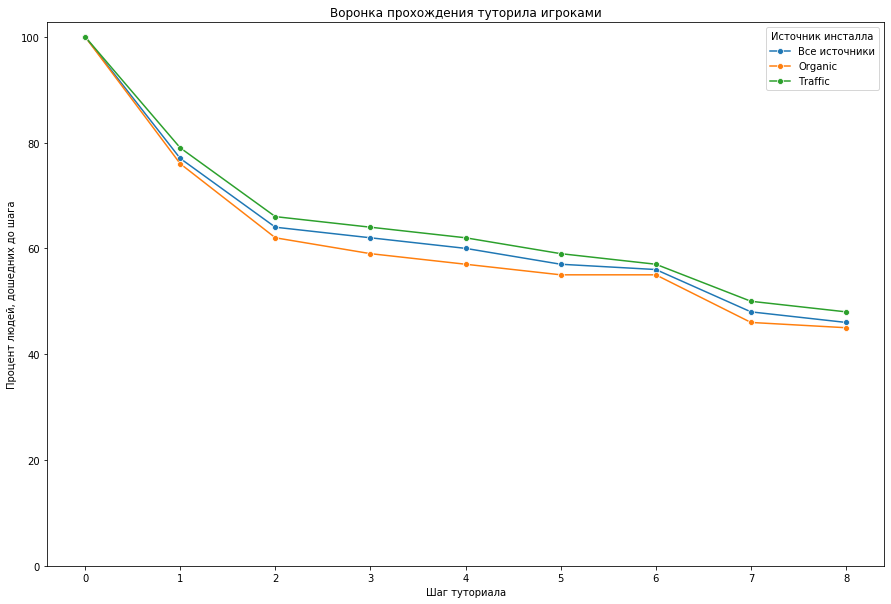

In [70]:
plt.figure(figsize = (15, 10))
_ = sns.lineplot(data = funnel_data, x = 'stages', y = 'percent_of_people', marker = 'o')
_ = sns.lineplot(data = funnel_data, x = 'stages', y = 'percent_of_people_Organic', marker = 'o')
_ = sns.lineplot(data = funnel_data, x = 'stages', y = 'percent_of_people_Traffic', marker = 'o')
_ = plt.legend(title = 'Источник инсталла', loc='upper right', labels=['Все источники', 'Organic', 'Traffic'])
_ = plt.gca().set(ylim = 0)
_ = plt.ylabel('Процент людей, дошедних до шага')
_ = plt.xlabel('Шаг туториала')
_ = plt.title('Воронка прохождения туторила игроками')

Из графика видно, что вне зависимости от источника инсталла около 40% аудитории отсеивается на первых 3-ех шагах туториала. Шаги 2-6 по всей видимости либо нравятся игрокам, либо не представляют особой трудности для них, т.к. почти все игроки, прошедние 2-ой шаг туториала проходят и 6-ой. На 7-ом шаге (свободный ход) уходит около 10% аудитории. Заверша.т туториал около 50% игроков.\
Аудитория, прривлеченная с помощью платного трафика проходит туториал чаще, чем игроки пришедшие из неоплаченного трафика.